{0: (0, 0), 1: (18.18240455365373, 14.21004013812693), 2: (10.375164277668256, 6.4052075364635686), 3: (18.482469151912376, 4.441516161357278), 4: (10.814761982274844, 14.776603705947595), 5: (9.458727015723916, 7.669446717414578), 6: (0.4259747467094388, 9.084457848489336), 7: (12.077391520012375, 15.508031307970914), 8: (8.878664799659877, 19.12491139225746), 9: (4.49071703748192, 4.845879499903871), 10: (15.410772539914197, 10.331580876089276), 11: (12.851495048788548, 5.454764290283228), 12: (7.831048437543515, 12.922095779339855), 13: (0.4805329850650719, 3.474263718441677), 14: (6.049439278644173, 8.905939412859407), 15: (1.3052203504334137, 15.833565635594697), 16: (3.6634041124266448, 8.343814297927054), 17: (12.376919943209428, 7.372862957634235), 18: (7.27043061199838, 14.769954421567995), 19: (5.095528040061188, 16.889967661748496), 20: (19.699170438968995, 8.585422313518203), 21: (0, 0)}
初始路径: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
初始

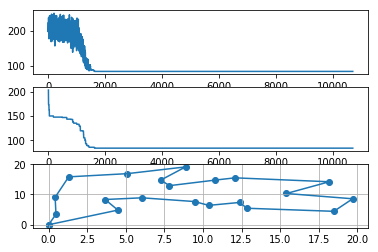

In [11]:
#模拟退火求解TSp

from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
    
def coordinate_init(size):
    #产生坐标字典
    coordinate_dict = {}
    coordinate_dict[0] = (0, 0)#起点是（0，0）
    for i in range(1, size + 1):#顺序标号随机坐标
        coordinate_dict[i] = (np.random.uniform(0, size), np.random.uniform(0, size))
    coordinate_dict[size + 1] = (0, 0)#终点是（0,0)
    return coordinate_dict
 
def distance_matrix(coordinate_dict,size):#生成距离矩阵
    d=np.zeros((size+2,size+2))
    for i in range(size+1):
        for j in range(size+1):
            if(i==j):
                continue
            if(d[i][j]!=0):
                continue
            x1 = coordinate_dict[i][0]
            y1 = coordinate_dict[i][1]
            x2 = coordinate_dict[j][0]
            y2 = coordinate_dict[j][1]
            distance=np.sqrt((x1-x2)**2+(y1-y2)**2)
            if(i==0):
                d[i][j]=d[size+1][j]=d[j][i]=d[j][size+1]=distance
            else:
                d[i][j]=d[j][i]=distance
    return d
 
def path_length(d_matrix,path_list,size):#计算路径长度
    length=0
    for i in range(size+1):
        length+=d_matrix[path_list[i]][path_list[i+1]]
    return length
 
def new_path(path_list,size):
    #二交换法
    change_head = np.random.randint(1,size+1)
    change_tail = np.random.randint(1,size+1)
    if(change_head>change_tail):
        change_head,change_tail=change_tail,change_head
    change_list = path_list[change_head:change_tail + 1]
    change_list.reverse()#change_head与change_tail之间的路径反序
    new_path_list = path_list[:change_head] + change_list + path_list[change_tail + 1:]
    return change_head,change_tail,new_path_list
 
def diff_old_new(d_matrix,path_list,new_path_list,head,tail):#计算新旧路径的长度之差
    old_length=d_matrix[path_list[head-1]][path_list[head]]+d_matrix[path_list[tail]][path_list[tail+1]]
    new_length=d_matrix[new_path_list[head-1]][new_path_list[head]]+d_matrix[new_path_list[tail]][new_path_list[tail+1]]
    delta_p=new_length-old_length
    return delta_p
 
 
T_start=2000#起始温度
T_end=1e-20#结束温度
a=0.995#降温速率
Lk=50#内循环次数,马尔科夫链长
size=20
coordinate_dict=coordinate_init(size)
print(coordinate_dict)#打印坐标字典
path_list=list(range(size+2))#初始化路径
d=distance_matrix(coordinate_dict,size)#距离矩阵的生成
best_path=path_length(d,path_list,size)#初始化最好路径长度
print('初始路径:',path_list)
print('初始路径长度:',best_path)
best_path_temp=[]#记录每个温度下最好路径长度
best_path_list=[]#用于记录历史上最好路径
balanced_path_list=path_list#记录每个温度下的平衡路径
balenced_path_temp=[]#记录每个温度下平衡路径(局部最优)的长度
while T_start>T_end:
    for i in range(Lk):
        head, tail, new_path_list = new_path(path_list, size)
        delta_p = diff_old_new(d, path_list, new_path_list, head, tail)
        if delta_p < 0:#接受状态
            balanced_path_list=path_list = new_path_list
            new_len=path_length(d,path_list,size)
            if(new_len<best_path):
                best_path=new_len
                best_path_list=path_list
        elif np.random.random() < np.exp(-delta_p / T_start):#以概率接受状态
            path_list = new_path_list
    path_list=balanced_path_list#继承该温度下的平衡状态（局部最优）
    T_start*=a#退火
    best_path_temp.append(best_path)
    balenced_path_temp.append(path_length(d,balanced_path_list,size))
print('结束温度的局部最优路径:',balanced_path_list)
print('结束温度的局部最优路径长度:',path_length(d,balanced_path_list,size))
print('最好路径:',best_path_list)
print('最好路径长度:',best_path)
x=[]
y=[]
for point in best_path_list:
    x.append(coordinate_dict[point][0])
    y.append(coordinate_dict[point][1])
plt.figure(1)
plt.subplot(311)
plt.plot(balenced_path_temp)#每个温度下平衡路径长度
plt.subplot(312)
plt.plot(best_path_temp)#每个温度下最好路径长度
plt.subplot(313)
plt.scatter(x,y)
plt.plot(x,y)#路径图
plt.grid()
plt.show()

In [2]:
"""
差分进化算法
原问题：min f(x1, x2, x3) = x1^2 + x2^2 + x3^2
				s.t.
				    x1*x2 >= 1
				    x1*x2 <= 5
				    x2 + x3 = 1
				    0 <= x1, x2, x3 <= 5
"""


def obj_func(p):
    x1, x2, x3 = p
    return x1 ** 2 + x2 ** 2 + x3 ** 2


constraint_eq = [
    lambda x: 1 - x[1] - x[2]
]

constraint_ueq = [
    lambda x: 1 - x[0] * x[1],
    lambda x: x[0] * x[1] - 5
]

from sko.DE import DE

de = DE(func=obj_func, n_dim=3, size_pop=50, max_iter=800, lb=[0, 0, 0], ub=[5, 5, 5],
        constraint_eq=constraint_eq, constraint_ueq=constraint_ueq)

best_x, best_y = de.run()
print('best_x:', best_x, '\n', 'best_y:', best_y)


best_x: [1.00710009 0.99304222 0.00695779] 
 best_y: [2.00043186]


In [7]:
import numpy as np

def schaffer(p):
    '''
    遗传算法
    This function has plenty of local minimum, with strong shocks
    global minimum at (0,0) with value 0
    '''
    x1, x2 = p
    x = np.square(x1) + np.square(x2)
    return 0.5 + (np.sin(x) - 0.5) / np.square(1 + 0.001 * x)

from sko.GA import GA

ga = GA(func=schaffer, n_dim=2, size_pop=50, max_iter=800, lb=[-1, -1], ub=[1, 1], precision=1e-7)
best_x, best_y = ga.run()
print('best_x:', best_x, '\n', 'best_y:', best_y)


best_x: [ 2.98023233e-08 -2.98023233e-08] 
 best_y: [1.77635684e-15]


best_x is  [0.         0.05000032 0.5       ] best_y is [0.25]


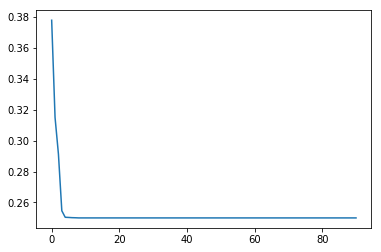

In [9]:
def demo_func(x):
    x1, x2, x3 = x
    return x1 ** 2 + (x2 - 0.05) ** 2 + x3 ** 2
from sko.PSO import PSO

pso = PSO(func=demo_func, dim=3, pop=40, max_iter=150, lb=[0, -1, 0.5], ub=[1, 1, 1], w=0.8, c1=0.5, c2=0.5)
pso.run()
print('best_x is ', pso.gbest_x, 'best_y is', pso.gbest_y)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(pso.gbest_y_hist)
plt.show()


In [12]:
#动态规划
#背包问题

import numpy as np
 
#定义重量
weight={}
weight["water"]=3
weight["book"]=1
weight["food"]=2
weight["jacket"]=2
weight["camera"]=1
#定义价值
worth={}
worth["water"]=10
worth["book"]=3
worth["food"]=9
worth["jacket"]=5
worth["camera"]=6
 
#存放行标对应的物品名:
table_name={}
table_name[0]="water"
table_name[1]="book"
table_name[2]="food"
table_name[3]="jacket"
table_name[4]="camera"
 
 
#创建矩阵,用来保存价值表
table=np.zeros((len(weight),6))
 
#创建矩阵，用来保存每个单元格中的价值是如何得到的（物品名）
table_class=np.zeros((len(weight), 6), dtype=np.dtype((np.str_,500)))
 
for i in range(0,len(weight)):
    for j in range(0,6):
        # 获取重量
        this_weight = weight[table_name[i]]
        # 获得价值
        this_worth = worth[table_name[i]]
        #获取上一个单元格 (i-1,j)的值
        if(i>0):
            before_worth=table[i-1,j]
            #获取（i-1,j-重量）
            temp=0
            if(this_weight<=j):
                temp=table[i-1,j-this_weight]
            #(i-1,j-this_weight)+求当前商品价值
            #判断this_worth能不能用，即重量有没有超标，如果重量超标了是不能加的
            synthesize_worth=0
            if(this_weight-1<=j):
                synthesize_worth=this_worth+temp
            #与上一个单元格比较,哪个大写入哪个
            if(synthesize_worth>before_worth):
                table[i,j]=synthesize_worth
                if(temp==0):
                    #他自己就超过了
                    table_class[i][j] = table_name[i]
                else:
                    # 他自己和(i-1,j-this_weight)
                    table_class[i][j] = table_name[i] + "," + table_class[i - 1][j - this_weight]
            else:
                table[i,j]=before_worth
                table_class[i][j]=table_class[i-1][j]
        else:
            #没有（i-1,j）那更没有(i-1,j-重量),就等于当前商品价值,或者重量不够，是0
            if(this_weight-1<=j):
                table[i,j]=this_worth
                table_class[i][j]=table_name[i]
print(table)
 
print("--------------------------------------")
 
print(table_class)

[[ 0.  0. 10. 10. 10. 10.]
 [ 3.  3. 10. 13. 13. 13.]
 [ 3.  9. 12. 13. 19. 22.]
 [ 3.  9. 12. 14. 19. 22.]
 [ 6.  9. 15. 18. 20. 25.]]
--------------------------------------
[['' '' 'water' 'water' 'water' 'water']
 ['book' 'book' 'water' 'book,water' 'book,water' 'book,water']
 ['book' 'food' 'food,book' 'book,water' 'food,water' 'food,book,water']
 ['book' 'food' 'food,book' 'jacket,food' 'food,water' 'food,book,water']
 ['camera' 'food' 'camera,food' 'camera,food,book' 'camera,jacket,food'
  'camera,food,water']]
